In [3]:
import numpy as np
import imageio
import sys
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
imageio.plugins.freeimage.download()
import scipy.stats as st

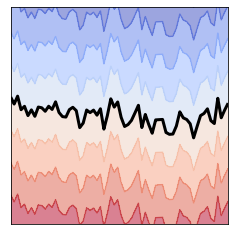

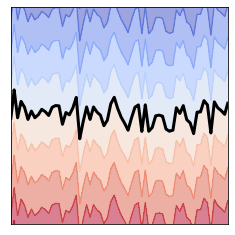

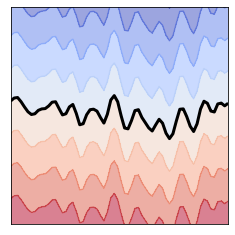

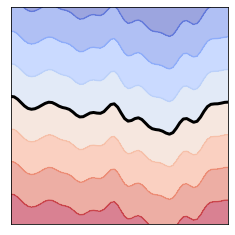

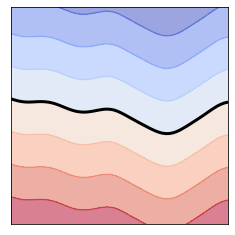

In [4]:

def plot_realization(file):
    realization = -np.reshape(np.fromfile(file, dtype=np.float32), (64,64))

    xs = np.linspace(-10, 10, 64)

    xx, yy = np.meshgrid(xs,xs)

    cs = plt.contour(xx, yy, realization, vmin=-10, vmax=10, alpha=0.5, levels=np.linspace(-15, 15, 11), cmap="coolwarm")
    cs.collections[5].set_linewidth(3)
    cs.collections[5].set_color("black")
    cs.collections[5].set_alpha(1.0)

    plt.contourf(xx, yy, realization, vmin=-10, vmax=10, levels=np.linspace(-15, 15, 11), alpha=0.5, cmap="coolwarm")
    plt.gca().set_aspect("equal")
    plt.yticks([])
    plt.xticks([])
    
    #plt.title(file[10:-8])

    #print(os.path.join("side-view-plots",os.path.split(file)[0]))
    dir = os.path.join("plots",os.path.split(file)[0])
    os.makedirs(dir, exist_ok=True)
    plt.savefig(os.path.join(dir, os.path.basename(file)[:-3] + "png"), dpi=300)
    plt.show()


for file in glob.glob("side-view/*/*.bin"):
    plot_realization(file)
